# ステレオ画像から距離計

## 目的

このチュートリアルでは
* ステレオ画像から距離マップを計算する方法を学ぶ．

## 基礎

前のチュートリアルでエピポーラ幾何の概念を学んだ．同一シーンを撮影した2枚の画像があれば，そのシーンの距離情報を取得できることは直観的に分かる．下に，この直観を証明する画像と数式を示す．(画像転載 : Bradski, G. & Kaehler, A. (2008). Learning OpenCV. O'Reilly )
![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_calib3d/py_depthmap/stereo_depth.png)

上記の図には相似な三角形を含んでいる(⊿POl Orと⊿Pxlxr)．この相似関係から、次の式が求められる:

　　　　　　　　$\displaystyle Z = f \frac{T}{(x^l- x^r)}$
        
ここで$x^l$は左のカメラの画像における点Pの投影点の座標(２つの直線の交点が原点)であり、$x^r$は右のカメラの画像における点Pの投影点の座標(それぞれ２つの直線の交点が原点)である(上の図では$x^l$ は正、$x^r$ は負の値を持つ。故に$d=x^l- x^r$($=d$, 視差)は正の値で、点$x^l$と点$x^r$間の距離と$T$との差を表す)。$T$は2台のカメラの投影中心間の距離(既知とする)、 $f$ はカメラの焦点距離(これも既知とする)である．簡潔に言えば，上の式が意味するところは、画像における対応点の距離が、カメラの投影中心と３次元の点との間の距離に「反比例」するということである．この情報を使って，画像におけるすべての点の距離を求めることができる．

まず2枚の画像の間の対応点を見つける．エピポーラ拘束についてはすでに学んでおり、この処理を速くかつ正確にできることは了解済みである。さて対応点を見つけてしまえば，視差(disparity)が計算できる．OpenCVを使ってどのように視差を計算するか見ていこう．

## 実装(コード)

次が視差マップ(disparity map)を計算するためのコードであり、 [cv2.StereoBM_create()](http://docs.opencv.org/3.0-last-rst/modules/calib3d/doc/camera_calibration_and_3d_reconstruction.html?highlight=stereobm#cv2.createStereoBM)関数を用いている。 ([左画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_calib3d/py_depthmap/tsukuba_l.png), [右画像](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_calib3d/py_depthmap/tsukuba_r.png))

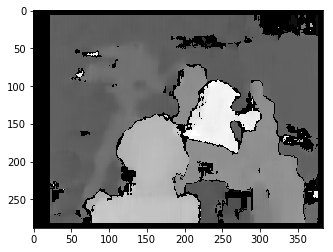

In [1]:
%matplotlib inline
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('tsukuba_l.png',0)
imgR = cv2.imread('tsukuba_r.png',0)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

以下に原画像の片方を示す．上の対応する視差マップを見て分かるように大きなノイズを含んでいる． `` numDisparities`` と `blockSize` の値を調整すると，より良い結果が得られるはずである．

![](http://lang.sist.chukyo-u.ac.jp/Classes/OpenCV/py_tutorials/py_calib3d/py_depthmap/tsukuba_l.png)

## 課題
1. OpenCVのサンプルの中に視差マップと3次元復元を行うサンプルが含まれている． [stereo_match.py](https://github.com/opencv/opencv/blob/master/samples/python/stereo_match.py) を試しに動かしてみてみよう．